# Problem 1

### 1.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
np.random.seed(0)

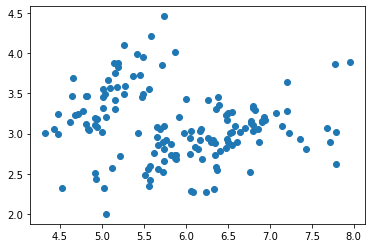

In [2]:
iris = np.genfromtxt("data/iris.txt", delimiter=None)
X = iris[:,0:2]
plt.scatter(X[:,0], X[:,1])
plt.show()

Based on the plot, I assume there are 3 clusters

### 1.2

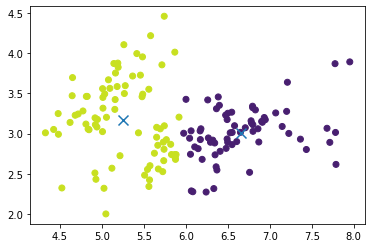

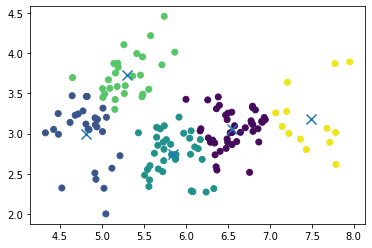

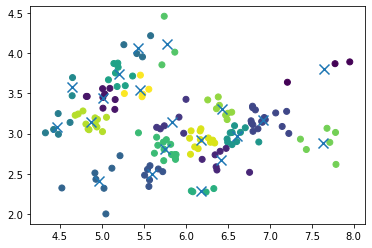

In [3]:
k = [2, 5, 20]
for i in k:
    z, mu, score = 0, 0, float('inf')
    for _ in range(4):
        z_temp, mu_temp, score_temp = ml.cluster.kmeans(X, i, "k++")
        if score_temp < score:
            z, mu, score = z_temp, mu_temp, score_temp
    ml.plotClassify2D(None,X,z)
    plt.scatter(mu[:,0], mu[:,1],s=100,marker="x") # Plot cluster centers
    plt.show()    

### 1.3

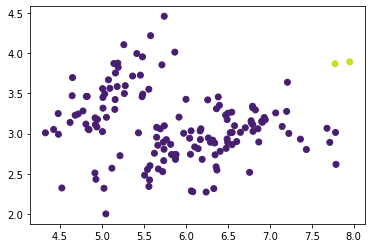

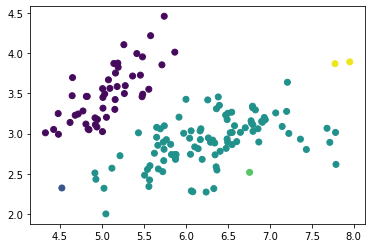

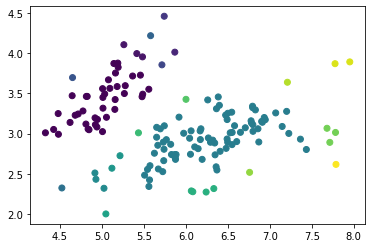

In [4]:
# Single Linkage (D_min)
for i in k:
    z,_ = ml.cluster.agglomerative(X,i,"min")
    ml.plotClassify2D(None,X,z)
    plt.show()

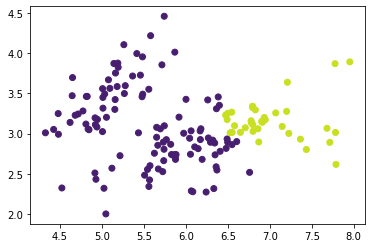

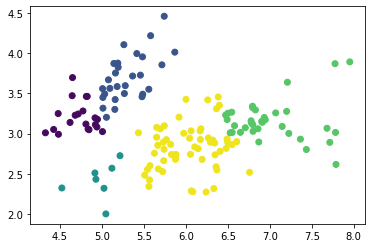

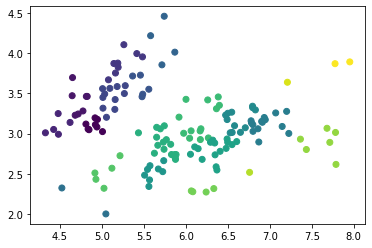

In [5]:
# Complete Linkage (D_max)
for i in k:
    z,_ = ml.cluster.agglomerative(X,i,"max")
    ml.plotClassify2D(None,X,z)
    plt.show()

### 1.4

For k-means, data is more evenly distributed among clusters, while single linkage of agglomerative clustering is more likely to have very big/small clusters. The results produced by complete linkage of agglomerative clustering tend to be more similar to those produced by k-means.

# Problem 2

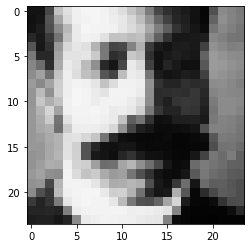

In [6]:
from scipy.linalg import svd
X = np.genfromtxt("data/faces.txt", delimiter=None) # load face dataset
plt.figure()
# pick a data point i for display
img = np.reshape(X[1,:],(24,24)) # convert vectorized data to 24x24 image patches
plt.imshow( img.T , cmap="gray",vmin=0,vmax=255) # display image patch; you may have to squint
plt.show()

### 2.1

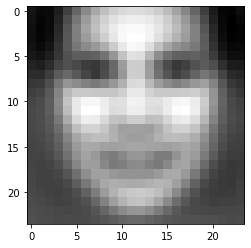

In [7]:
mu = np.mean(X,axis=0,keepdims=True)
X0 = X - mu
plt.figure()
img = np.reshape(mu,(24,24))
plt.imshow( img.T , cmap="gray") # display image patch; you may have to squint
plt.show()

### 2.2

In [8]:
U, S, V = svd(X0, full_matrices=False)
W = U.dot(np.diag(S))
print("Shape of W: ", W.shape)
print("Shape of V: ", V.shape)

Shape of W:  (4916, 576)
Shape of V:  (576, 576)


### 2.3

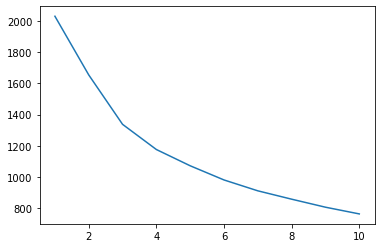

In [9]:
MSE = []
K = [i for i in range(1, 11)]
for k in K:
    Xhat = np.dot(W[:,:k],V[:k,:])
    MSE.append(np.mean((X0-Xhat)**2))
plt.plot(K, MSE)
plt.show()

### 2.4

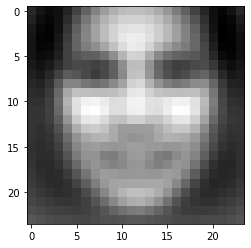

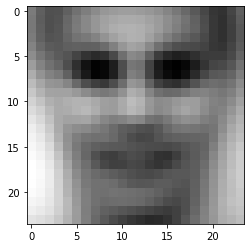

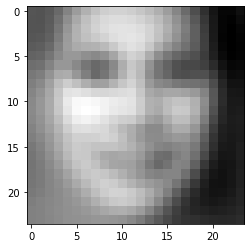

In [10]:
for i in range(3):
    alpha = 2*np.median(np.abs(W[:,i]))
    Dir = np.reshape(mu + alpha*V[i,:], (24,24))
    plt.imshow(Dir.T, cmap="gray")
    plt.show()

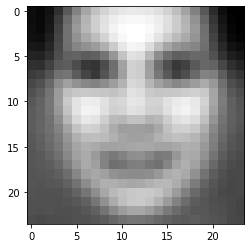

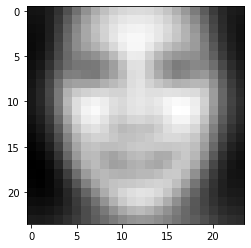

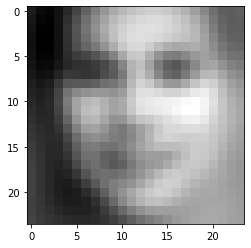

In [11]:
for i in range(3):
    alpha = 2*np.median(np.abs(W[:,i]))
    Dir = np.reshape(mu - alpha*V[i,:], (24,24))
    plt.imshow(Dir.T, cmap="gray")
    plt.show()

### 2.5

Original Face 2


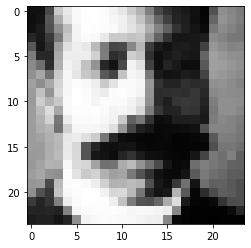

Reconstructed Faces
k =  5


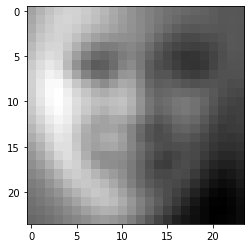

k =  10


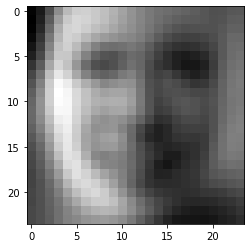

k =  50


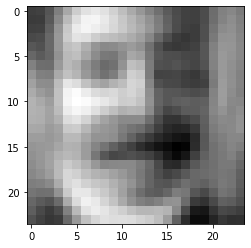

k =  100


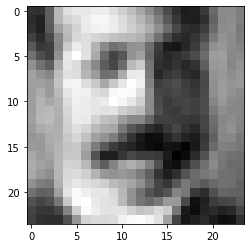

In [12]:
K = [5, 10, 50, 100]
print("Original Face 2")
img = X[1,:]
img = np.reshape(img, (24,24))
plt.imshow(img.T, cmap="gray")
plt.show()
print("Reconstructed Faces")
for k in K:
    print("k = ", k)
    img = mu + W[1,:k].dot(V[:k,:])
    img = np.reshape(img, (24,24))
    plt.imshow(img.T, cmap="gray")
    plt.show()

Original Face 4


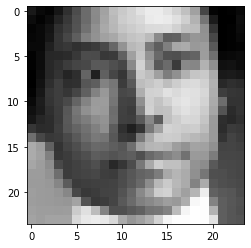

Reconstructed Faces
k =  5


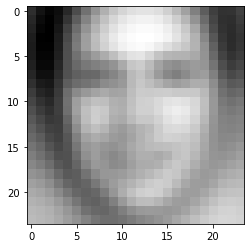

k =  10


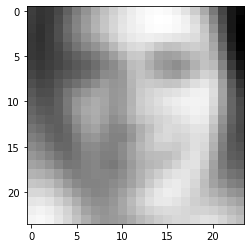

k =  50


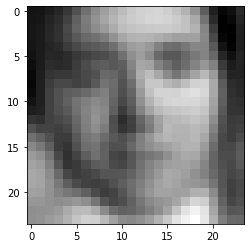

k =  100


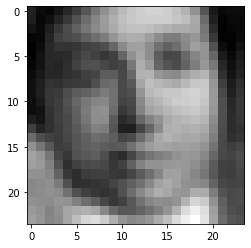

In [13]:
print("Original Face 4")
img = X[3,:]
img = np.reshape(img, (24,24))
plt.imshow(img.T, cmap="gray")
plt.show()
print("Reconstructed Faces")
for k in K:
    print("k = ", k)
    img = mu + W[3,:k].dot(V[:k,:])
    img = np.reshape(img, (24,24))
    plt.imshow(img.T, cmap="gray")
    plt.show()

### 2.6

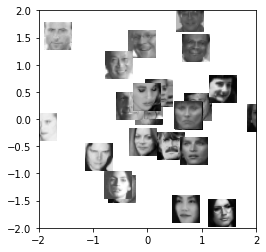

In [14]:
idx = [np.random.randint(0, 4916) for _ in range(25)] # pick some data (randomly or otherwise); an array of integer indices
# 4916 faces in total
import mltools.transforms
coord,params = ml.transforms.rescale( W[:,0:2] ) # normalize scale of "W" locations
plt.figure();
for i in idx:
# compute where to place image (scaled W values) & size
    loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5)
    img = np.reshape( X[i,:], (24,24) ) # reshape to square
    plt.imshow( img.T , cmap="gray", extent=loc, vmin=0,vmax=255 ) # draw each image
    plt.axis( (-2,2,-2,2) ) # set axis to a reasonable scale

# Problem 3

For this homework, I relied mainly on the concepts and code in the lecture slides. I did not collaborate with any other student. This is an interesting homework :)